In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
emotion_df = pd.read_json('emotion.json')
emotion_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,emotion,emotion:confidence,emotion_gold,id,idiom_id,sentence,vector,vector2
0,731671736,False,finalized,5,2015-06-08 16:10:00,Neutral,0.3333,None,1,1,How much of the forecast was genuine and how m...,"[-0.3147698939, -0.1973676533, -0.0417886712, ...",NaN
1,731671737,False,finalized,5,2015-06-12 14:33:00,Neutral,0.3885,None,2,2,I did touch them one time you see but of cours...,"[-0.3418201804, -0.2601769567, -0.013053854, 0...",NaN
2,731671738,False,finalized,5,2015-06-08 16:10:00,Neutral,0.3333,None,3,3,We find that choice theorists admit that they ...,"[-0.1503912359, -0.1339014024, -0.062264159300...",NaN
3,731671739,False,finalized,5,2015-06-08 16:30:00,Neutral,0.3690,None,4,4,"Well, here I am with an olive branch.","[-0.1617787629, -0.2586824596, -0.0578601174, ...",NaN
4,731671740,False,finalized,5,2015-06-08 16:30:00,Neutral,0.5572,None,5,5,"Its rudder and fin were both knocked out, and ...","[-0.2855877578, -0.1949298233, -0.2057530284, ...",NaN


Question 1:Create a couple of data visualizations showing frequency of the different emotions, and the distributions of confidence by emotion

Visualizing emotion distribuition in the data set

<AxesSubplot:xlabel='emotion', ylabel='count'>

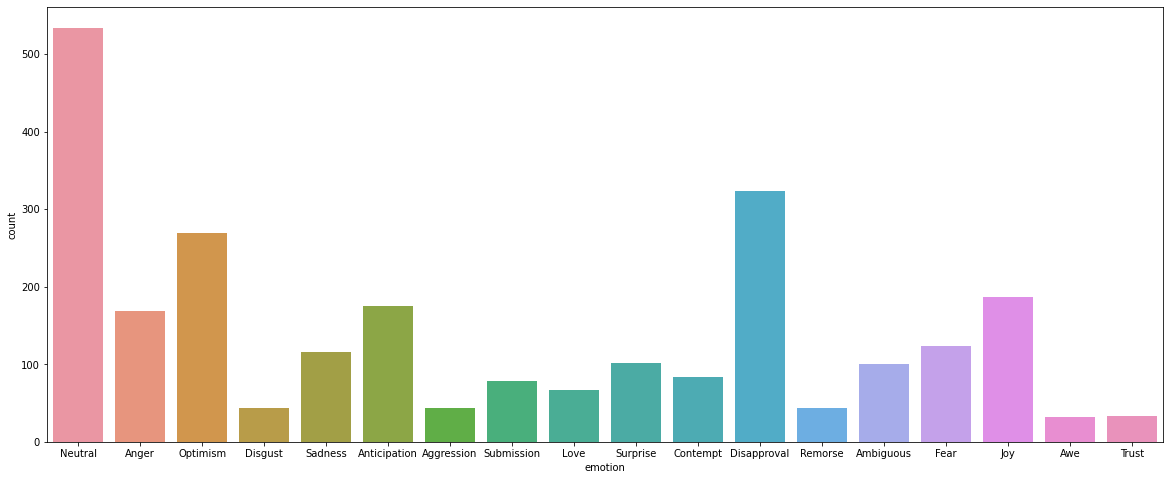

In [3]:
plt.figure(figsize=(20, 8))
sns.countplot(x="emotion",data=emotion_df)

Visualzing confidence level for each emotion-Average confidence per emotion

<AxesSubplot:xlabel='emotion:confidence', ylabel='emotion'>

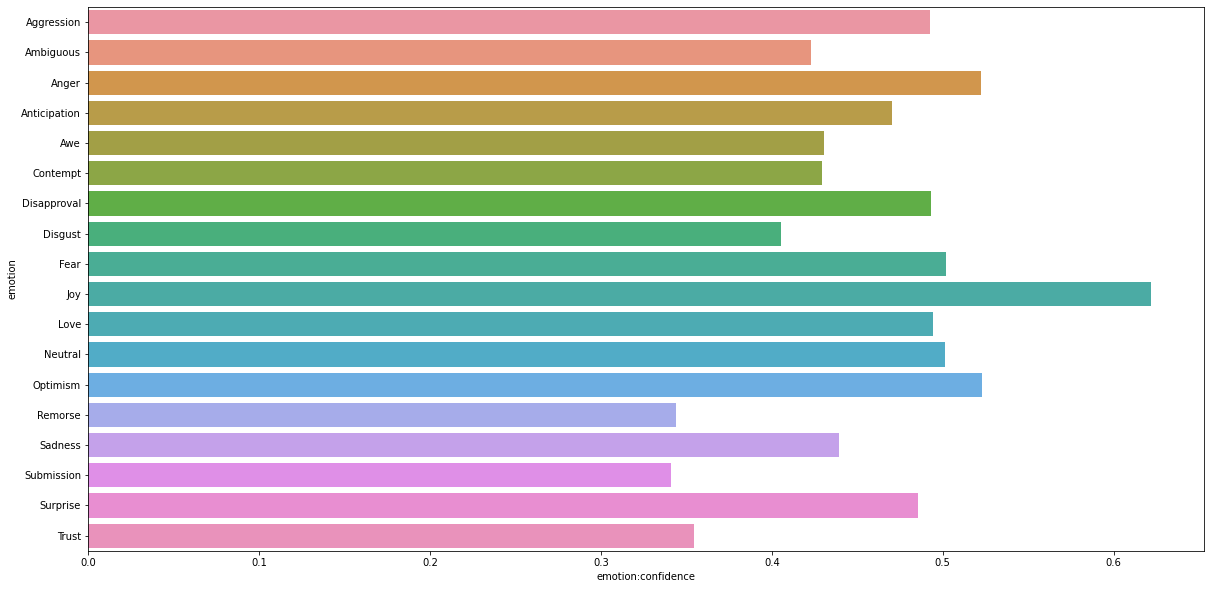

In [4]:
grouped_df = emotion_df.groupby('emotion').mean()
plt.figure(figsize=(20, 10))
sns.barplot(x=grouped_df['emotion:confidence'],y=grouped_df.index)


Distribution of confidence for each emotion

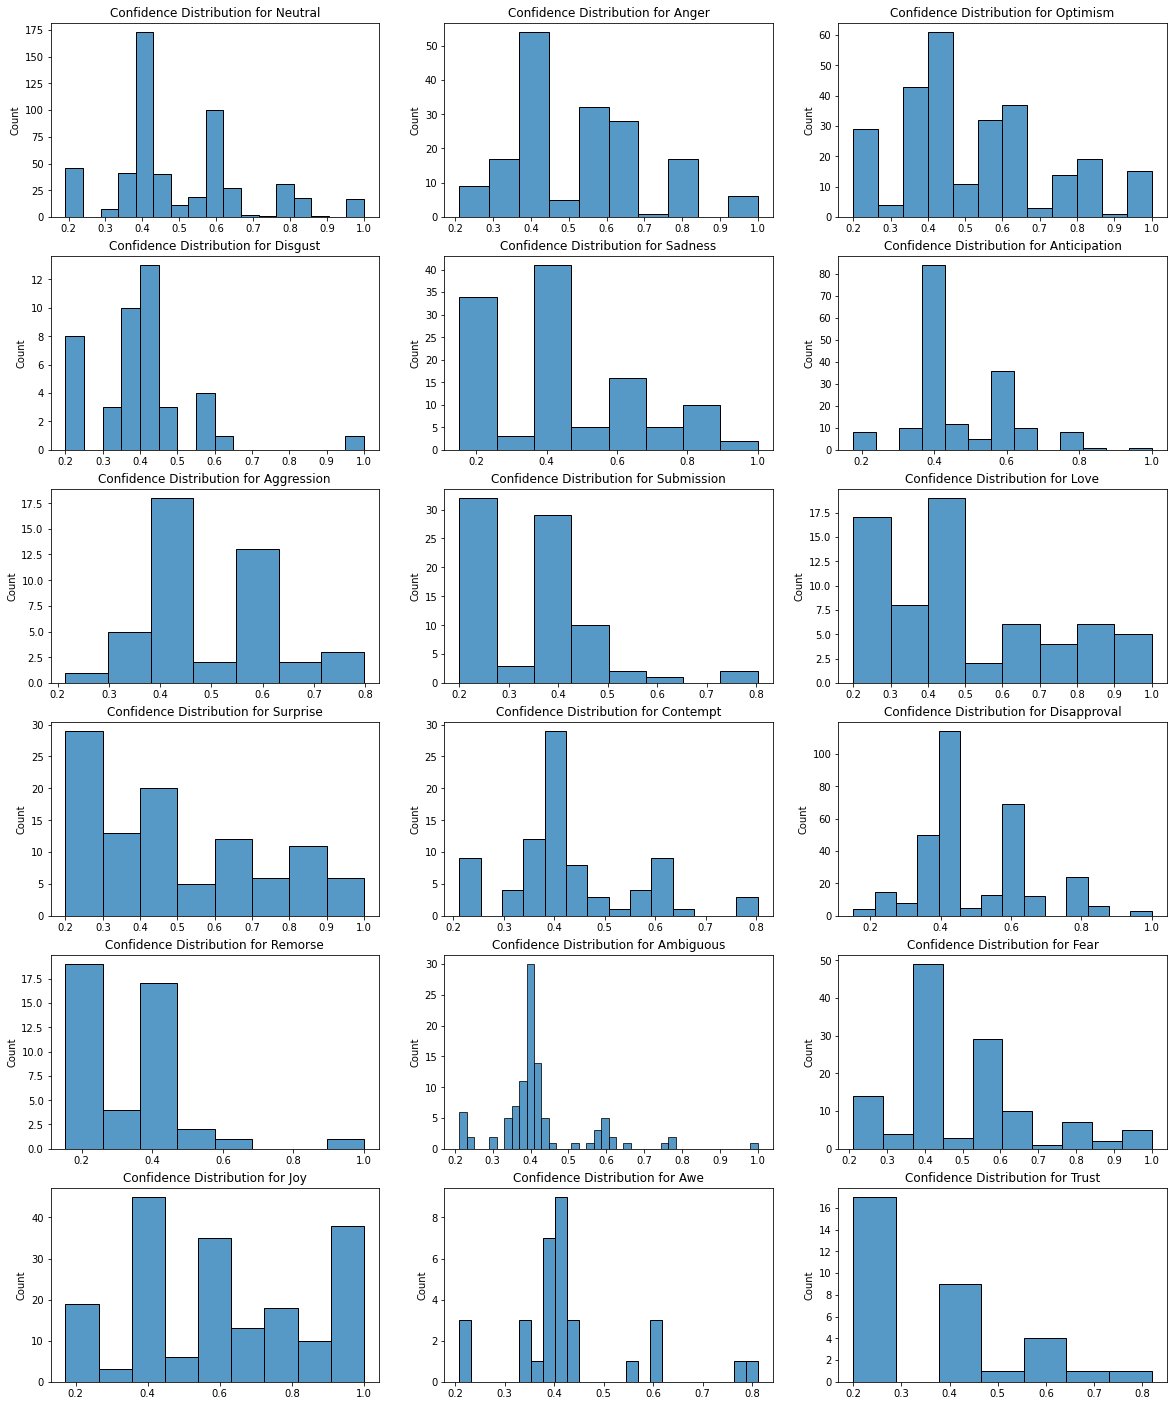

In [5]:
emotions=emotion_df.emotion.unique()

fig, axes = plt.subplots(6, 3, figsize=(20,25))
for ax,emotion in zip(axes.flatten(),emotions):
    sub_df=emotion_df[emotion_df['emotion']==emotion]
    pl=sns.histplot(x='emotion:confidence', data=sub_df,ax=ax)
    pl.set(xlabel=None)
    pl.set_title('Confidence Distribution for '+emotion)  


Question 2:Is there a relationship between certain emotions and the rater’s confidence in those emotions? (i.e. are some emotions inherently less obvious to raters?) Make you case both statistically and with visualizations

In [6]:
grouped_df

,_unit_id,_golden,_trusted_judgments,emotion:confidence,id,idiom_id,vector2
emotion,,,,,,,
Aggression,7.316730e+08,0.000000,5.113636,0.492389,2243.022727,272.340909,NaN
Ambiguous,7.316729e+08,0.000000,5.190000,0.422945,2133.580000,284.640000,NaN
Anger,7.316729e+08,0.094675,6.502959,0.522230,2082.875740,151.218935,NaN
Anticipation,7.316730e+08,0.000000,5.125714,0.470539,2307.691429,333.560000,NaN
Awe,7.316731e+08,0.000000,5.156250,0.430400,2500.218750,407.218750,NaN
Contempt,7.316730e+08,0.000000,5.289157,0.429565,2196.397590,270.518072,NaN
Disapproval,7.316789e+08,0.024768,5.557276,0.492907,2229.941176,312.832817,NaN
Disgust,7.316728e+08,0.023256,5.534884,0.405251,1992.976744,252.046512,NaN
Fear,7.316884e+08,0.016129,5.338710,0.501969,2329.919355,327.241935,NaN


By finding the mean confidence level for each emotion we can say that there isnt any difference, so we will do an anova test to find if emotion and confidence value are related or not

In [7]:
sample_df=emotion_df[['emotion','emotion:confidence']]

CategoryGroupLists=sample_df.groupby('emotion')['emotion:confidence'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.3669407453265814e-42


As P value is very less than 0.05 we reject Null Hypothesis, so confidence level and emotions are related

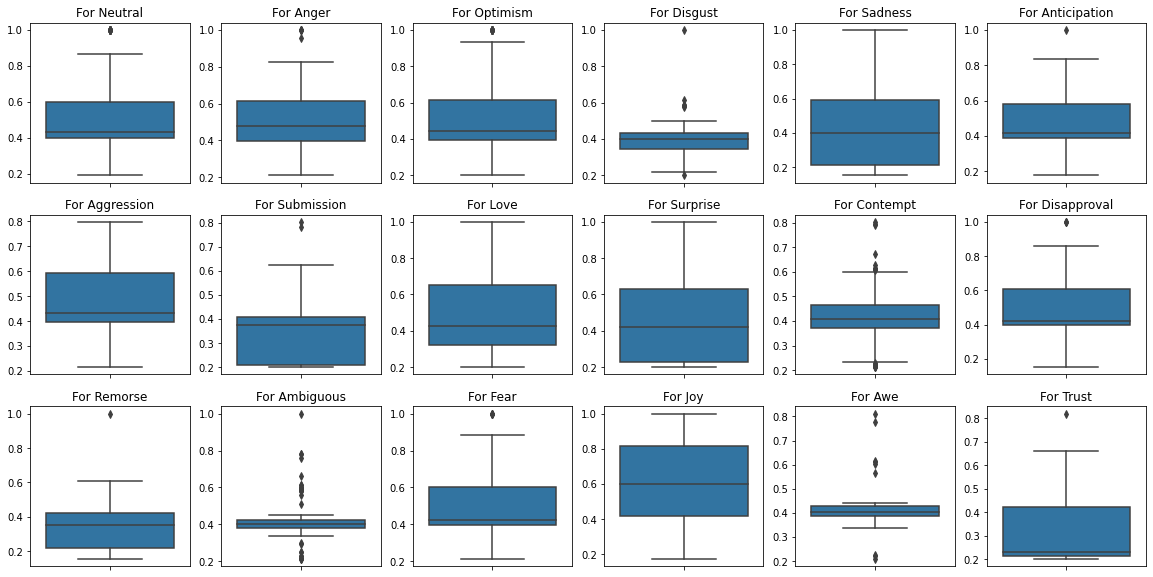

In [8]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
for ax,emotion in zip(axes.flatten(),emotions):
    sub_df=emotion_df[emotion_df['emotion']==emotion]
    pl=sns.boxplot(y='emotion:confidence', data=sub_df,ax=ax)
    pl.set(xlabel=None)
    pl.set(ylabel=None)
    pl.set_title('For '+emotion)

Also, by seeing the box plots we can see the distribution and say some emotions like submission, remorse, trust have lesser values(less obvious) than others

Question 3:Build a python (object oriented) class that is designed to tokenize the sentences and keep track of which emotions get associated with each word.

Class to form word:emotion relation, frequency distribution of each word and ploting for most relevant and significant words

In [29]:
class EmotionAnalysis: 
    analysis={}
    emotioncounter={}
    baserates={}
    wordfreq={}
    listfreqwords=[]
    prominentwords=[]
    
    def __init__(self,data_df):
        series=data_df['emotion'].value_counts()
        self.emotioncounter=series.to_dict()

        sump= sum(self.emotioncounter.values())
        self.baserates=self.emotioncounter.copy()
        for key,value in self.baserates.items():
            self.baserates[key]=float(value/sump)

    # method add_one_sentence(sentence, emotion) that breaks the sentence into words 
    # (i.e. unigrams) that are case insensitive and logs counts of each word-emotion association
    def add_one_sentence(self,sentence, emotion): 
        sentence=sentence.lower()       
        words=sentence.split()
        for word in words:
            if word in self.analysis.keys():
                if emotion in self.analysis[word].keys():
                    self.analysis[word][emotion]+=1
                else:
                    self.analysis[word].update({emotion:1})                
            else:
                self.analysis[word]={emotion:1}
    
    # function to return the frequency of each emotion for an individual word normalized by the 
    # base rates for the emotions (i.e. how frequently is a specific categorized as each emotion, 
    # after accounting for how frequent each emotion is in the dataset)
    def get_word_frequency(self):
        for word,emotions in self.analysis.items():
            self.wordfreq[word]={}
            for em in self.emotioncounter.keys():
                if em in emotions.keys():
                    self.wordfreq[word][em]=self.analysis[word][em]/self.emotioncounter[emotion]
                else:
                    self.wordfreq[word].update({em:0})
    
    # Plot these distributions for the words that 1) appear more than 100 times but 2) have the 
    # emotion distributions that are the most different from the base rates of each emotion (based on whatever metric you like)
    def plotdistribution(self):
        for word, emotions in self.wordfreq.items():
            if sum(self.analysis[word].values())>100:
                self.listfreqwords.append(word)
                c1=list(self.baserates.values())
                c2=list(emotions.values())  
                ctable=[c1,c2]
                stat, p, dof, expected = chi2_contingency(ctable)                
                if p<0.05:
                    self.prominentwords.append(word)



In [30]:
emotion_analysis=EmotionAnalysis(emotion_df)

for index,row in emotion_df.iterrows():
    emotion_analysis.add_one_sentence(row['sentence'],row['emotion'])

emotion_analysis.get_word_frequency()



We will use Chi Square Independence test for Frequent words and find similarity between them and Base rate.
If the distribution has p value<0.05 then we can say the distriution is different

In [31]:
emotion_analysis.plotdistribution()
print("Words >100")
print(emotion_analysis.listfreqwords)


Words >100
['of', 'the', 'was', 'and', 'it', 'is', 'a', 'i', 'you', 'but', 'there', 'he', 'we', 'that', 'they', 'at', 'with', 'an', 'were', 'in', 'on', 'out', 'my', 'are', 'can', 'from', 'she', 'had', 'up', 'her', 'to', 'your', 'as', 'not', 'this', 'all', 'get', 'or', 'about', 'like', 'would', 'be', 'for', 'make', 'his', 'if', 'have', 'so', 'when', 'will', 'go', 'by']


In [33]:
print("Words satisfying the conditions")
print(emotion_analysis.prominentwords)

Words satisfying the conditions
[]


We can clearly see that there are not words that fullfill the criteria, So
All words that have count more that 100 are very similar to base rate of emotion distriution

We also observe that words >100 count are all common words so they do not make much sense

Question 4:Are the sentence vectors useful in predicting the emotion labels (1024 dim vectors in the last column)? Make your case either way.
In addition to statistical evidence, show some data visualization to show how the vector does or doesn’t map to emotion labels

We will not extract the sentence vector and do PCA and plot them with respect to emotion

In [19]:
vector_df=pd.DataFrame(emotion_df['vector'].tolist())

In [13]:
from sklearn.decomposition import PCA

In [24]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
emotion_df["codedemotion"]=label.fit_transform(emotion_df["emotion"])

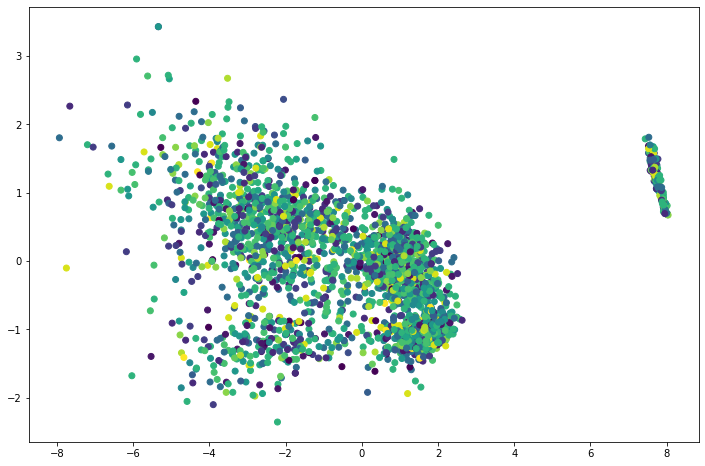

In [25]:
pca = PCA(0.95)
Xt = pca.fit_transform(vector_df)

plt.figure(figsize=(12,8))
plot = plt.scatter(Xt[:,0], Xt[:,1],c=emotion_df['codedemotion'])

So we can clearly see that the vectors do not form any pattern or cluster and do not provide necessary information regarding emotions